# Pyber Ride Sharing
Pyber Exercise
written by: A. Lam

# Analysis:
- Observation 1: Assuming that fares are directly related to distance driven, it would make sense that urban cities would have a higher quantity of rides per city with shorter fares. Similarly, rural areas would have less frequent rides spanning much larger distances, resulting in higher average fares.
- Observation 2: The quantity of rides contributed by Urban cities offsets the fact that most of them have much lower fares than rural areas, as evidenced by the bubble chart and pie chart on total fares.
- Observation 3: Port James has a surprisingly high number of rides uncharacteristic of any other city in the dataset.

# Setup

In [1]:
# Modules
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import raw data
city_data_path = os.path.join('..','Instructions','Pyber','raw_data','city_data.csv')
ride_data_path = os.path.join('..','Instructions','Pyber','raw_data','ride_data.csv')
city_data = pd.read_csv(city_data_path)
ride_data = pd.read_csv(ride_data_path)

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
# Join of data sources
all_data = pd.merge(city_data,ride_data,on='city')
all_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble Plot of Ride Sharing Data
Include:
- Average Fare per City (y)
- Total Rides per City (x)
- Total Drivers per City (Bubble Size)
- City Type (Color)

In [6]:
city_types = all_data['type'].unique()
colors = ['gold','lightskyblue','lightcoral']
# add color assignment
c_assign = pd.DataFrame({'type' : city_types,
                        'color' : colors})
all_data_colored = pd.merge(all_data,c_assign,on='type')
all_data_colored.head()
# Create groupby over city
city_group = all_data_colored.groupby(['city'])
bubble_data = pd.DataFrame({
    'Average Fare' : round(city_group['fare'].mean(),2),
    'Total Rides' : city_group['ride_id'].count(),
    'Total Drivers' : city_group['driver_count'].mean(), # should all be the same value per city
    'City Type' : city_group['type'].min(), # should be identical per city
    'color' : city_group['color'].min() # should be identical per city
    })
bubble_data.head()

,Average Fare,City Type,Total Drivers,Total Rides,color
city,,,,,
Alvarezhaven,23.93,Urban,21,31,gold
Alyssaberg,20.61,Urban,67,26,gold
Anitamouth,37.32,Suburban,16,9,lightskyblue
Antoniomouth,23.62,Urban,21,22,gold
Aprilchester,21.98,Urban,49,19,gold


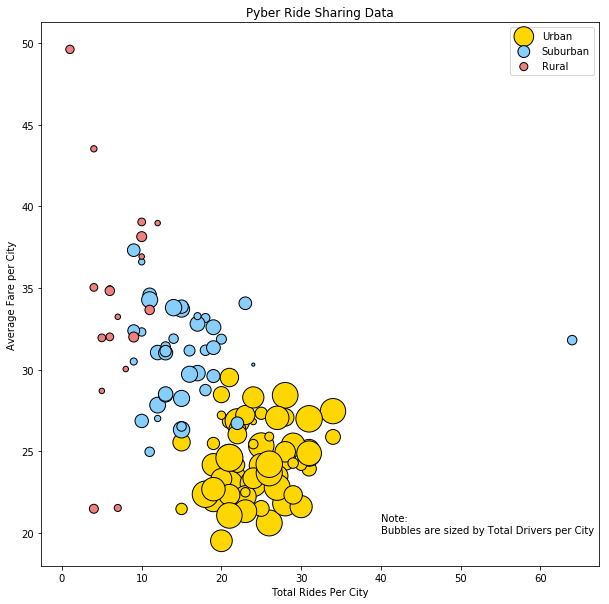

In [7]:
# bubble_data.loc[bubble_data['City Type'] == city_types[0]]['Average Fare']
plt.figure(figsize = (10,10))
sf = 10 # scaling factor
for i in range(len(bubble_data['City Type'].unique())):
    ctype = bubble_data['City Type'].unique()[i]
    x = bubble_data.loc[bubble_data['City Type'] == ctype]['Total Rides']
    y = bubble_data.loc[bubble_data['City Type'] == ctype]['Average Fare']
    size = bubble_data.loc[bubble_data['City Type'] == ctype]['Total Drivers']
    plt.scatter(x, y, s = sf*size, 
                color = bubble_data.loc[bubble_data['City Type'] == ctype]['color'], 
                                      label = city_types[i], edgecolor = 'k')

plt.legend()
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Rides Per City')
plt.ylabel('Average Fare per City')
plt.text(40,20,'Note: \nBubbles are sized by Total Drivers per City')
plt.show()

In [8]:
# identify outlier
bubble_data.sort_values(by=['Total Rides'],ascending=False).head()

,Average Fare,City Type,Total Drivers,Total Rides,color
city,,,,,
Port James,31.81,Suburban,9,64,lightskyblue
Port Johnstad,25.88,Urban,22,34,gold
Swansonbury,27.46,Urban,64,34,gold
South Louis,27.09,Urban,12,32,gold
Alvarezhaven,23.93,Urban,21,31,gold


# Total Fares by City Type

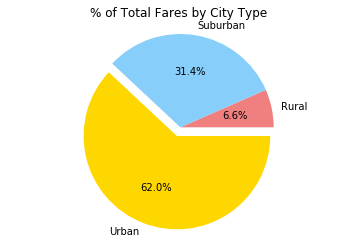

In [16]:
group_type = all_data_colored.groupby(['type'])
plt.pie(group_type['fare'].sum(),
        labels = group_type['fare'].sum().keys(), 
        colors = group_type['color'].min(), 
        explode = [0,0,0.1],
       autopct = '%1.1f%%')
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

# Total Rides by City Type

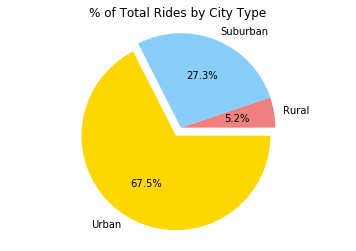

In [17]:
group_type = bubble_data.groupby(['City Type'])
plt.pie(group_type['Total Rides'].sum(),
        labels = group_type['Total Rides'].sum().keys(), 
        colors = group_type['color'].min(), 
        explode = [0,0,0.1],
       autopct = '%1.1f%%')
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

# Total Drivers by City Type

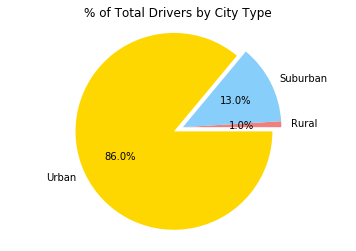

In [18]:
group_type = all_data_colored.groupby(['type'])
plt.pie(group_type['driver_count'].sum(),
        labels = group_type['driver_count'].sum().keys(), 
        colors = group_type['color'].min(), 
        explode = [0,0,0.1],
       autopct = '%1.1f%%')
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()